In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca
import mlgrad.plots as plots


In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',', index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [3]:
X0 = df.values
N = len(X0)
W = X0[:,0].max() - X0[:,0].min()
H = X0[:,1].max() - X0[:,1].min()
H *= 3
W *= 3

In [4]:
alpha = (N-6)/N
print(alpha)

0.8723404255319149


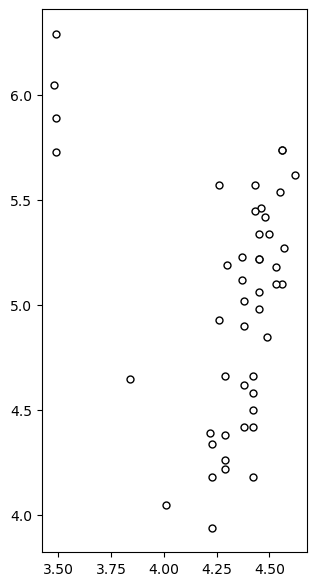

In [5]:
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', s=25, edgecolors='k')
plt.show()

[4.310 5.012]


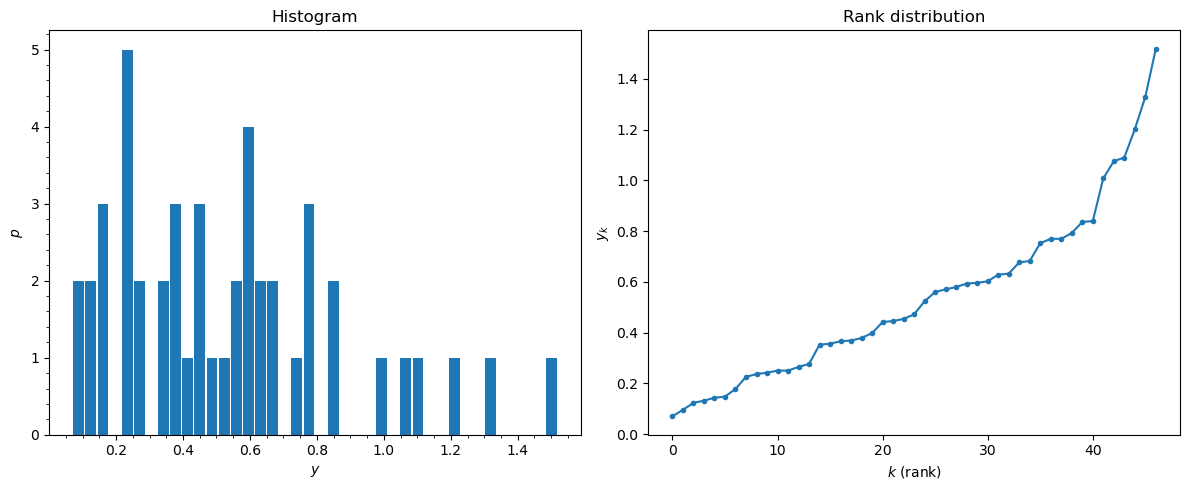

In [6]:
c0 = pca.location(X0)
print(c0)
plots.plot_hist_and_rank_distribution(pca.distance_center(X0, c0))

[4.310 5.012]


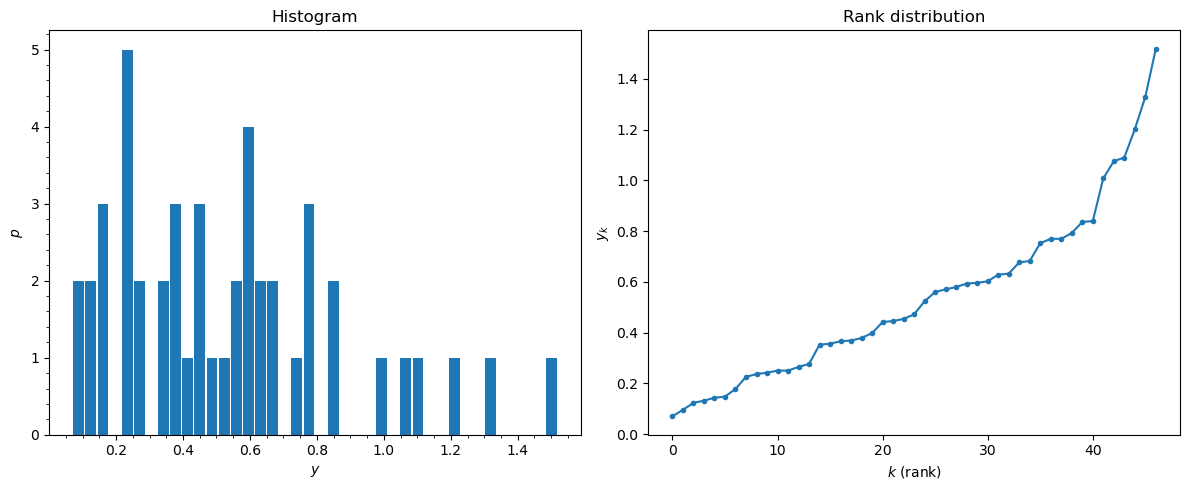

In [7]:
alpha = (N-6)/N
wma = af.averaging_function("WMZ", rhofunc=funcs.SoftAbs_Sqrt(0.001), kwds={'alpha':4.5})
c = pca.robust_location(X0, wma)
print(c)
plots.plot_hist_and_rank_distribution(pca.distance_center(X0, c))

In [8]:
X1 = X0 - c
X1_0 = X0 - c0

0.3242305208468309 [-0.14  0.99]


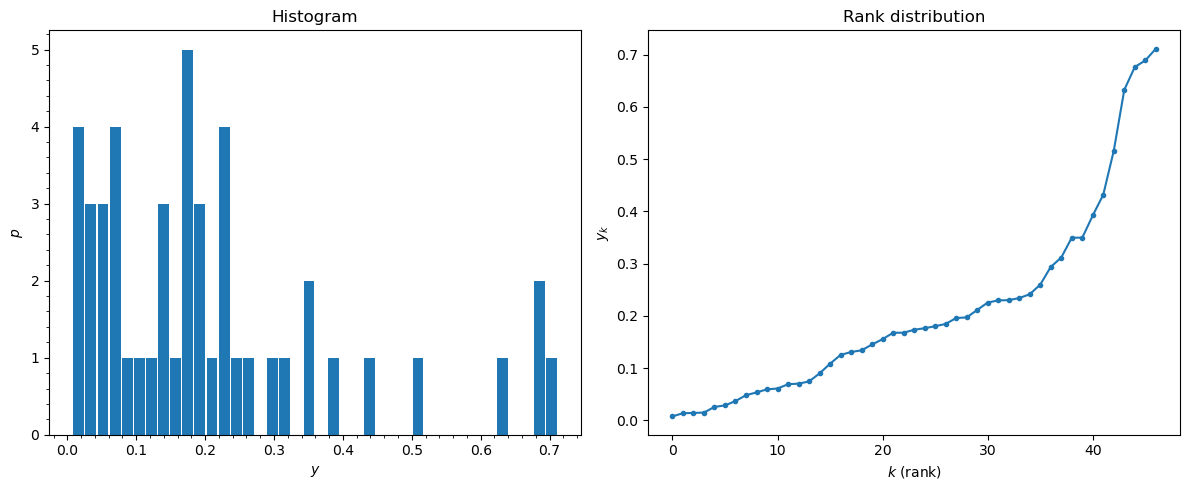

In [9]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)
plots.plot_hist_and_rank_distribution(pca.distance_line(X1_0, a1_0))

0.1962049777689735 [0.179 0.984]


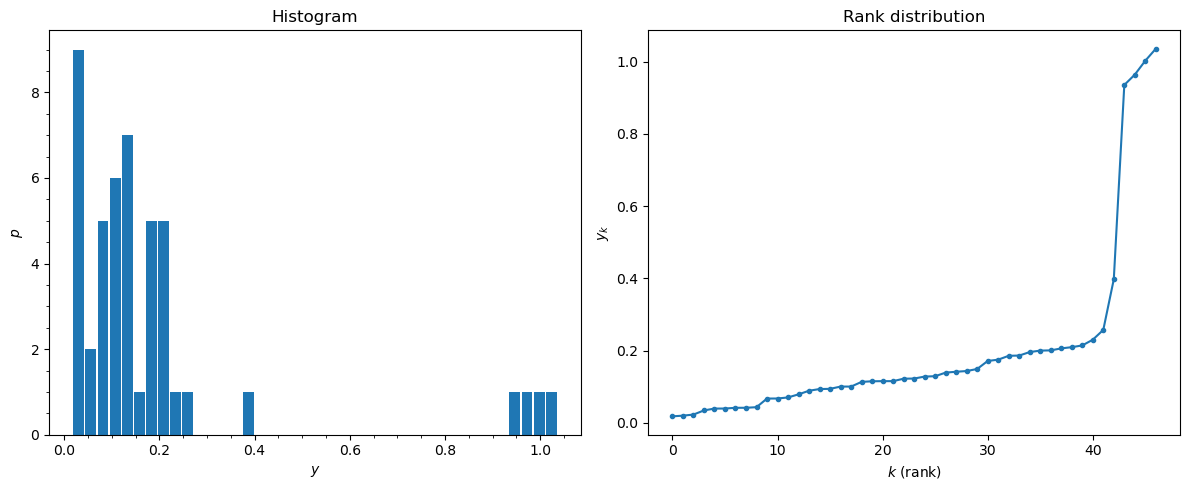

In [10]:
alpha = (N-5)/N
# wma = af.averaging_function("WMZ", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001), kwds={'alpha':5.0})
a1, L1 = pca.find_robust_pc(X1, wma, tol=1.0e-8)
print(L1, a1)
plots.plot_hist_and_rank_distribution(pca.distance_line(X1, a1))

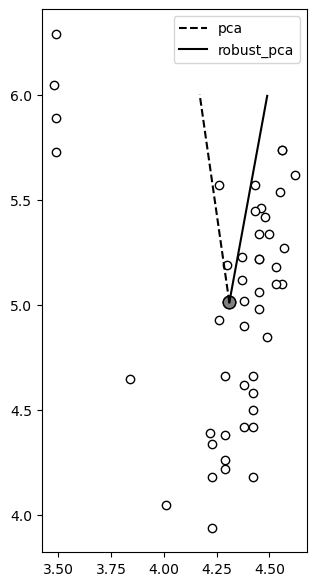

In [11]:
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='grey', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='grey', edgecolors='k')
plt.plot([c0[0], c0[0]+a1_0[0]], [c0[1], c0[1]+a1_0[1]], c='k', linestyle='--', label='pca')
plt.plot([c[0], c[0]+a1[0]], [c[1], c[1]+a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()

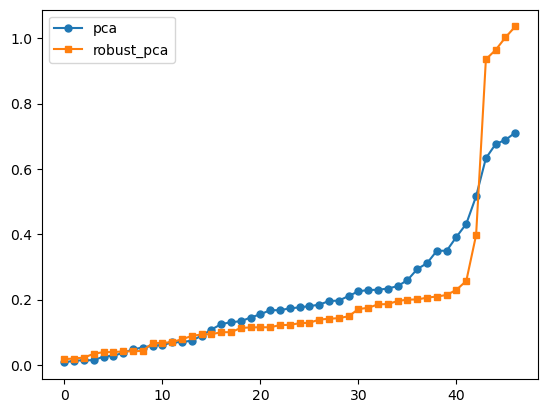

In [12]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=5, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=5, label='robust_pca')
plt.legend()
plt.show()

In [13]:
# plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
# plt.minorticks_on()
# plt.grid(1)
# plt.show()

In [14]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

0.07793090966471297 [0.99 0.14] 1.0


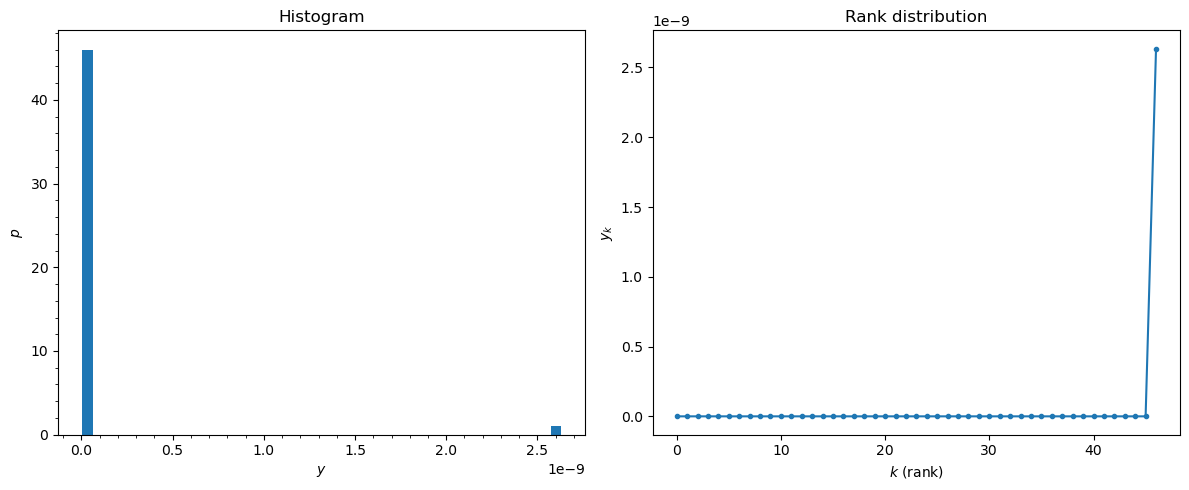

In [15]:
a2_0, L2_0 = pca.find_pc(X2_0, tol=1.0e-9)
print(L2_0, a2_0, a2_0 @ a2_0)
plots.plot_hist_and_rank_distribution(pca.distance_line(X2_0, a2_0))

0.021915610460095304 [ 0.984 -0.179]


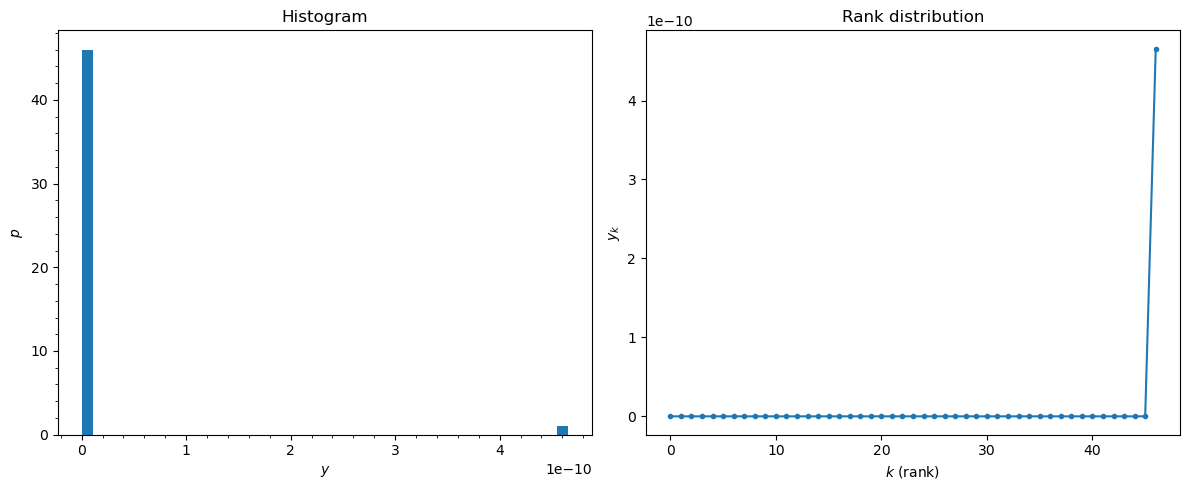

In [16]:
alpha = (N-8)/N
# wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma, tol=1.0e-9)
print(L2, a2)
plots.plot_hist_and_rank_distribution(pca.distance_line(X2, a2))

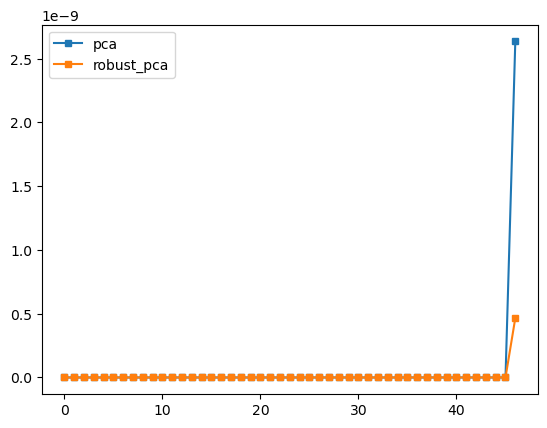

In [17]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

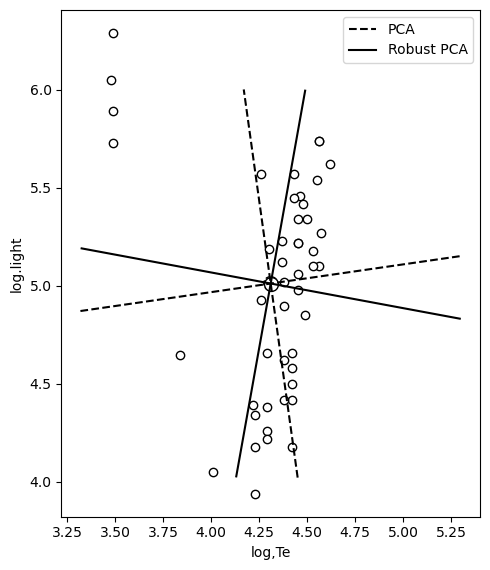

In [18]:
aa = 16/9
plt.figure(figsize=(5, 5.8))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]-a1_0[0], c0[0], c0[0]+a1_0[0]], [c0[1]-a1_0[1], c0[1], c0[1]+a1_0[1]], 
         c='k', linestyle='--', label='PCA')
plt.plot([c0[0]-a2_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]-a2_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--')
plt.plot([c[0]-a1[0], c[0], c[0]+a1[0]], [c[1]-a1[1], c[1], c[1]+a1[1]], 
         c='k', label='Robust PCA')
plt.plot([c[0]-a2[0], c[0], c[0]+a2[0]], [c[1]-a2[1], c[1], c[1]+a2[1]], 
         c='k')
plt.legend()
plt.xlabel('log,Te')
plt.ylabel('log.light')
plt.tight_layout()
# plt.savefig('fig/robust_pca_starsCYG_0.eps')
plt.show()

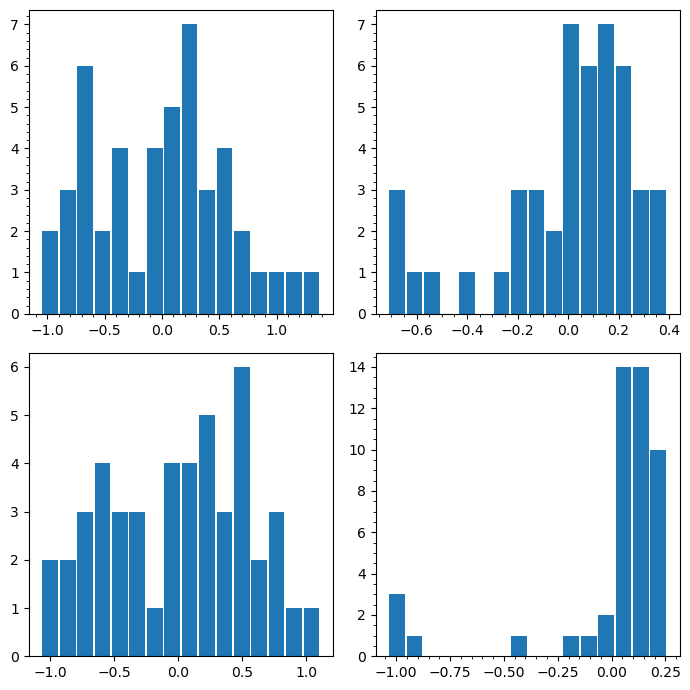

In [19]:
U1 = X1 @ a1
U2 = X1 @ a2

U1_0 = X1_0 @ a1_0
U2_0 = X1_0 @ a2_0

plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.hist(U1_0, bins=16, rwidth=0.9)
plt.minorticks_on()
plt.subplot(2,2,2)
plt.hist(U2_0, bins=16, rwidth=0.9)
plt.minorticks_on()
plt.subplot(2,2,3)
plt.hist(U1, bins=16, rwidth=0.9)
plt.subplot(2,2,4)
plt.minorticks_on()
plt.hist(U2, bins=16, rwidth=0.9)
plt.minorticks_on()
plt.tight_layout()
plt.show()


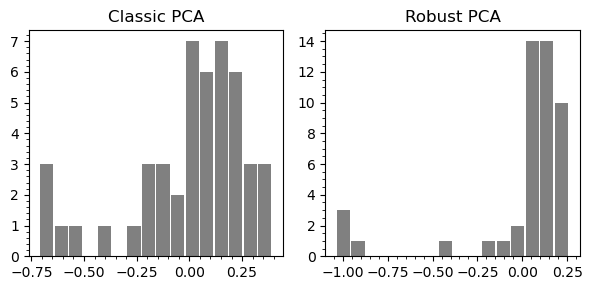

In [20]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.title('Classic PCA')
plt.hist(U2_0, bins=16, rwidth=0.9, color='Grey')
plt.minorticks_on()
plt.subplot(1,2,2)
plt.title('Robust PCA')
plt.hist(U2, bins=16, rwidth=0.9, color='Grey')
plt.minorticks_on()
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG_hist.eps')
plt.show()


In [21]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [22]:
wma = af.averaging_function("WMZ", kwds={"alpha":5.2})
S = pca.robust_scatter_matrix(X1, wma)
print(S)

[[ 6.027 -1.262]
 [-1.262  0.430]] 0.2512938343092725
[[ 3.163 -0.207]
 [-0.207  0.330]] 0.19718515689170174
[[ 3.552 -0.315]
 [-0.315  0.309]] 0.1923235368911545
[[ 3.774 -0.311]
 [-0.311  0.291]] 0.18816800450484636
K: 99
[[ 3.774 -0.311]
 [-0.311  0.291]]


In [23]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.996  0.088]
 [-0.088  0.996]]


-1.942890293094024e-16

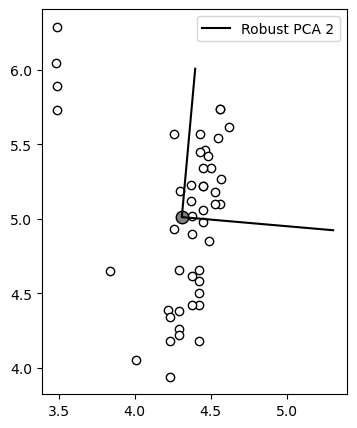

In [24]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='Grey', edgecolors='k')
plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
         c='k', label='Robust PCA 2')
plt.legend()
plt.show()

In [25]:
# plt.figure(figsize=(4,4))
# plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
# plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
# plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
# plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
#          c='k', linestyle='--', label='pca')
# plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
#          c='k', label='robust pca I')
# plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
#          c='k', linestyle=':', label='robust pca II')
# plt.legend()
# plt.xlabel('log.Te')
# plt.ylabel('log.light')
# plt.tight_layout()
# plt.savefig('fig/robust_pca_starsCYG_1.eps')
# plt.show()

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca_sk = PCA()
pca_sk.fit(X0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

[[-0.14  0.99]
 [-0.99 -0.14]]


array([4.310, 5.012])

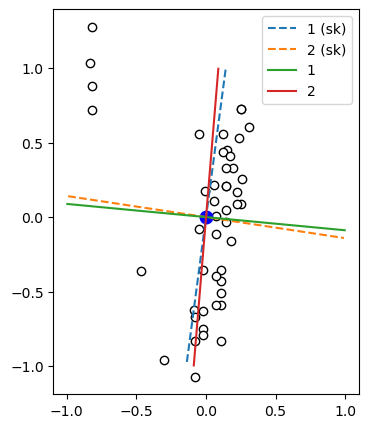

In [28]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(X1[:,0], X1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()

In [29]:
3.0/0.6745

4.447739065974797